In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
from imports import *

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import helper

In [4]:
WILD_TYPE_ORIGINALS = '/raid/mpsych/RISTERLAB/VSOverviewTileSet/Acquired/'
NINA_D1_ORIGINALS = '/raid/mpsych/RISTERLAB/NINA_D1_MUTANT/VSOverviewTileSet/Acquired/'

In [5]:
WILD_TYPE_RAW = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/wild_type_raw/'
NINA_D1_RAW = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/nina_d1_raw/'

In [6]:
helper.check(WILD_TYPE_RAW)
helper.check(NINA_D1_RAW)

In [7]:
DATA_DIR = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/04-13/'

In [8]:
helper.check(DATA_DIR)

In [9]:
DATA_DIR_WILD_TYPE = DATA_DIR + 'wild_type/'
DATA_DIR_NINA_D1 = DATA_DIR + 'nina_d1/'

In [10]:
helper.check(DATA_DIR_WILD_TYPE)
helper.check(DATA_DIR_NINA_D1)

In [11]:
WILD_TYPE_NORM = DATA_DIR_WILD_TYPE + 'norm/'
NINA_D1_NORM = DATA_DIR_NINA_D1 + 'norm/'

In [12]:
helper.check(WILD_TYPE_NORM)
helper.check(NINA_D1_NORM)

In [13]:
WILD_TYPE_NORM_NPY_PATH = os.path.join(WILD_TYPE_NORM, 'wild_type_norm.npy')
NINA_D1_NORM_NPY_PATH = os.path.join(NINA_D1_NORM, 'nina_d1_norm.npy')

In [14]:
helper.a2brandom(WILD_TYPE_ORIGINALS, WILD_TYPE_RAW, 300)
helper.a2brandom(NINA_D1_ORIGINALS, NINA_D1_RAW, 300)

  0%|          | 0/1724 [00:00<?, ?it/s]

Copied 10 random images to /raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/wild_type_raw/


  0%|          | 0/4338 [00:00<?, ?it/s]

Copied 10 random images to /raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/nina_d1_raw/


In [15]:
norm_imgs = []
for z in tqdm(sorted(os.listdir(WILD_TYPE_RAW))):
    if (z.endswith("tif")):
        img = mh.imread(os.path.join(WILD_TYPE_RAW, z))
        img = helper.norm(img)
        norm_imgs.append(img)
        mh.imsave(os.path.join(WILD_TYPE_NORM, z), img)
np.save(WILD_TYPE_NORM_NPY_PATH, norm_imgs)

  0%|          | 0/300 [00:00<?, ?it/s]

In [16]:
norm_imgs = []
for z in tqdm(sorted(os.listdir(NINA_D1_RAW))):
    if (z.endswith("tif")):
        img = mh.imread(os.path.join(NINA_D1_RAW, z))
        img = helper.norm(img)
        norm_imgs.append(img)
        mh.imsave(os.path.join(NINA_D1_NORM, z), img)
np.save(NINA_D1_NORM_NPY_PATH, norm_imgs)

  0%|          | 0/300 [00:00<?, ?it/s]

In [17]:
wild_type_norm_imgs = np.load(WILD_TYPE_NORM_NPY_PATH)

In [18]:
wild_type_norm_imgs.shape

(300, 4096, 6144)

In [48]:
z = wild_type_norm_imgs[100]

In [30]:
z.shape

(4096, 6144)

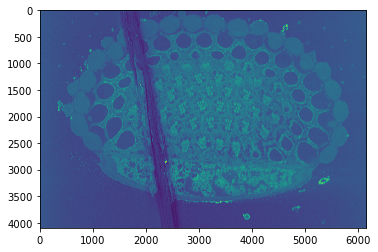

In [31]:
plt.imshow(z)

In [49]:
x, y = z.shape[0], z.shape[1]

In [50]:
x, y

(4096, 6144)

In [51]:
new_x = 1500
new_y = 2000

In [52]:
left = int((x - new_x)/2)
top = int((y - new_y)/2)
right = int((x + new_x)/2)
bottom = int((y + new_y)/2)

In [53]:
left, top, right, bottom

(1298, 2072, 2798, 4072)

In [54]:
z = z [left:right, top: bottom]

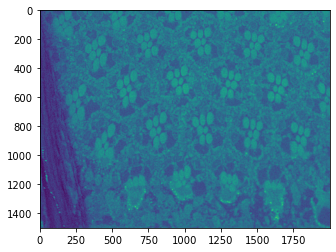

In [55]:
plt.imshow(z)

In [56]:
def center_crop(x_og, y_og, x_new, y_new):
    left = int((x_og - x_new)/2)
    top = int((y_og - y_new)/2)
    right = int((x_og + x_new)/2)
    bottom = int((y_og + y_new)/2)
    
    return left, top, right, bottom

In [57]:
WILD_TYPE_CROP = DATA_DIR_WILD_TYPE + 'crop/'
NINA_D1_CROP = DATA_DIR_NINA_D1 + 'crop/'

helper.check(WILD_TYPE_CROP)
helper.check(NINA_D1_CROP)

WILD_TYPE_CROP_NPY_PATH = os.path.join(WILD_TYPE_CROP, 'wild_type_crop.npy')
NINA_D1_CROP_NPY_PATH = os.path.join(NINA_D1_CROP, 'nina_d1_crop.npy')

In [63]:
crop_imgs = []
i = 1

x, y = wild_type_norm_imgs.shape[1], wild_type_norm_imgs.shape[2]
x_new, y_new = 3000, 4000
left, top, right, bottom = center_crop(x, y, x_new, y_new)

for img in tqdm(wild_type_norm_imgs):
    img = img[left:right, top:bottom]
    crop_imgs.append(img)
    mh.imsave(os.path.join(WILD_TYPE_CROP, str(i) + '.tif'), img)
    i = i + 1
np.save(WILD_TYPE_CROP_NPY_PATH, crop_imgs)

  0%|          | 0/300 [00:00<?, ?it/s]

In [64]:
nina_d1_norm_imgs = np.load(NINA_D1_NORM_NPY_PATH)

In [65]:
nina_d1_norm_imgs.shape

(300, 4096, 6144)

In [66]:
NINA_D1_NORM_NPY_PATH

'/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/04-13/nina_d1/norm/nina_d1_norm.npy'

In [83]:
z = nina_d1_norm_imgs[200]

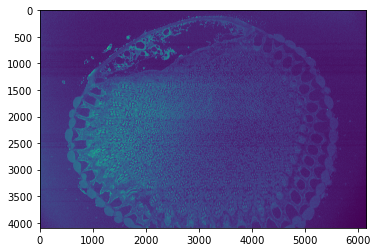

In [84]:
plt.imshow(z)

In [85]:
z.max(), z.min()

(1.0, 0.0)

In [86]:
x, y = z.shape[0], z.shape[1]

In [87]:
new_x = 1500
new_y = 2000

In [88]:
left, top, right, bottom = center_crop(x, y, new_x, new_y)

In [89]:
z = z [left:right, top: bottom]

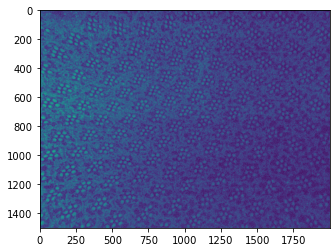

In [90]:
plt.imshow(z)

In [91]:
crop_imgs = []
i = 1

x, y = nina_d1_norm_imgs.shape[1], nina_d1_norm_imgs.shape[2]
x_new, y_new = 3000, 4000
left, top, right, bottom = center_crop(x, y, x_new, y_new)

for img in tqdm(nina_d1_norm_imgs):
    img = img[left:right, top:bottom]
    crop_imgs.append(img)
    mh.imsave(os.path.join(NINA_D1_CROP, str(i) + '.tif'), img)
    i = i + 1
np.save(NINA_D1_CROP_NPY_PATH, crop_imgs)

  0%|          | 0/300 [00:00<?, ?it/s]

In [92]:
wild_type_crop_imgs = np.load(WILD_TYPE_CROP_NPY_PATH)

In [93]:
wild_type_crop_imgs.shape

(300, 3000, 4000)

In [98]:
z = wild_type_crop_imgs[200]

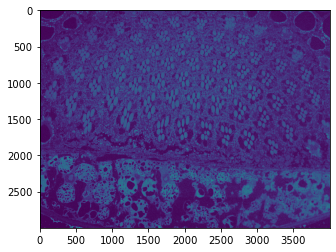

In [99]:
plt.imshow(z)

In [100]:
z.shape

(3000, 4000)

In [103]:
a = z.copy()

In [104]:
a = mh.gaussian_filter(a, sigma=3)

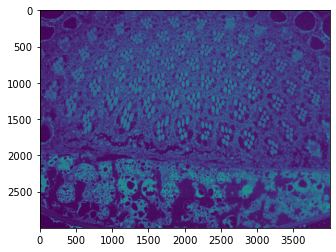

In [105]:
plt.imshow(a)

In [106]:
a.shape

(3000, 4000)

In [107]:
a.max(), a.min()

(0.5601135239019217, 0.0006927442481609057)

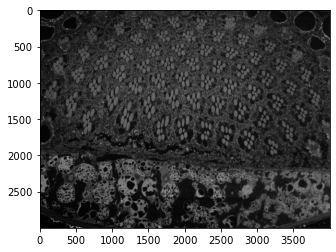

In [108]:
plt.imshow(a, cmap='gray')

In [109]:
type(a)

numpy.ndarray

In [110]:
a.dtype

dtype('float64')

In [112]:
a = a.astype(np.uint8)

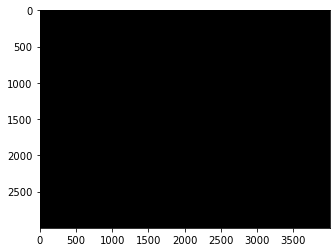

In [114]:
plt.imshow(a, cmap='gray')

In [115]:
a.max(), a.min()

(0, 0)

In [116]:
a = z.copy()

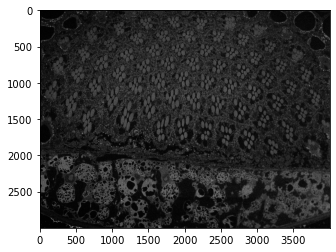

In [117]:
plt.imshow(a, cmap='gray')

In [118]:
a.max(), a.min()

(0.7333180708180708, 0.0)

In [119]:
a = a * 255

In [120]:
a.max(), a.min()

(186.99610805860806, 0.0)

In [121]:
a = a.astype(np.uint8)

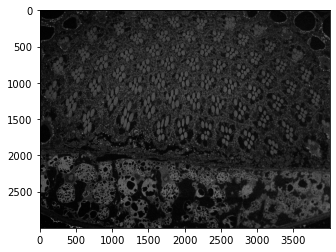

In [123]:
plt.imshow(a, cmap='gray')

In [124]:
a.max(), a.min()

(186, 0)

In [125]:
t_otsu = mh.otsu(a)

In [126]:
t_otsu

31

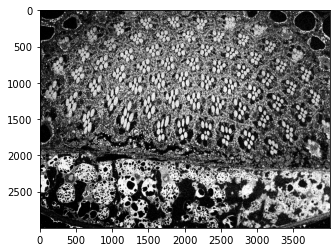

In [129]:
plt.imshow(a > t_otsu, cmap='gray')

In [130]:
a = z.copy()

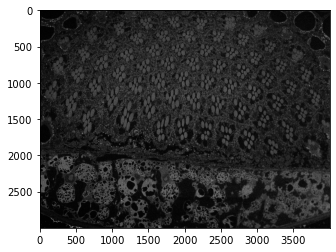

In [131]:
plt.imshow(a, cmap='gray')

In [132]:
a = mh.gaussian_filter(a, sigma=3)

In [137]:
a.max(), a.min()

(142, 0)

In [134]:
a = a * 255

In [136]:
a = a.astype(np.uint8)

In [138]:
t_otsu = mh.otsu(a)

In [139]:
t_otsu

29

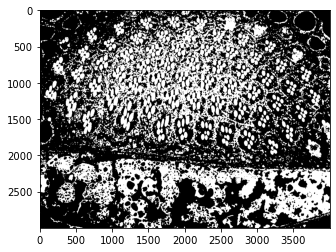

In [140]:
plt.imshow(a > t_otsu, cmap='gray')

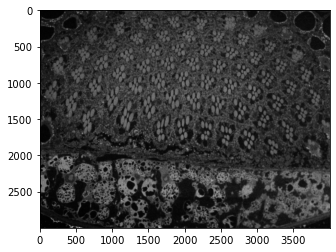

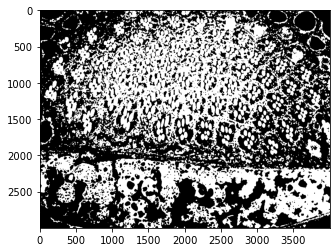

In [142]:
a = z.copy()
a = mh.gaussian_filter(a, sigma=4)
plt.figure()
plt.imshow(a, cmap='gray')
a = (a > a.mean())
plt.figure()
plt.imshow(a, cmap='gray')

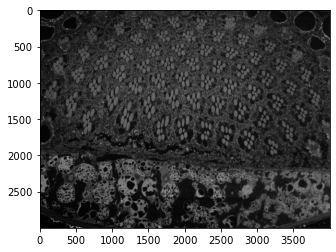

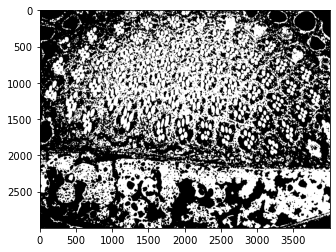

In [143]:
a = z.copy()
a = mh.gaussian_filter(a, sigma=3)
plt.figure()
plt.imshow(a, cmap='gray')
a = (a > a.mean())
plt.figure()
plt.imshow(a, cmap='gray')

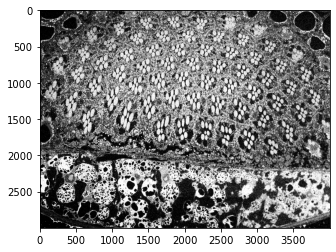

In [144]:
a = z.copy()
# a = mh.gaussian_filter(a, sigma=4)
# plt.figure()
# plt.imshow(a, cmap='gray')
a = (a > a.mean())
plt.figure()
plt.imshow(a, cmap='gray')

0 186
uint8
0 255
uint8


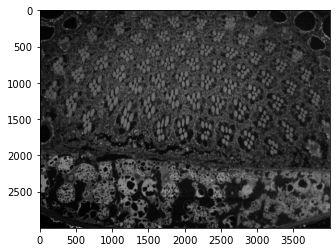

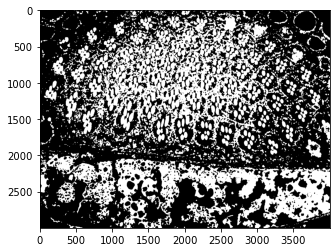

In [152]:
a = z.copy()
a = a * 255
a = a.astype(np.uint8)
print(a.min(), a.max())
print(a.dtype)
a = mh.gaussian_filter(a, sigma=4)
plt.figure()
plt.imshow(a, cmap='gray')
a = a/a.max()
a = a * 255
a = a.astype(np.uint8)
print(a.min(), a.max())
print(a.dtype)
t_otsu = mh.otsu(a)
a = (a > t_otsu)
plt.figure()
plt.imshow(a, cmap='gray')

In [153]:
labeled, n_nucleus  = mh.label(a)
print('Found {} nuclei.'.format(n_nucleus))

Found 2009 nuclei.


In [196]:
z = wild_type_norm_imgs[200]

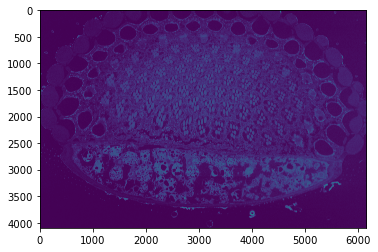

In [197]:
plt.imshow(z)

In [198]:
x, y = z.shape[0], z.shape[1]

In [199]:
x_new, y_new = 1500, 2000

In [200]:
left, top, right, bottom = center_crop(x, y, x_new, y_new)

In [201]:
a = z[left:right, top:bottom]

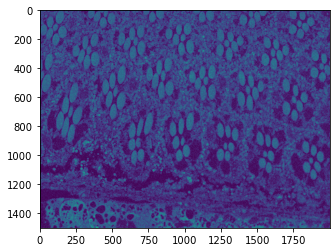

In [202]:
plt.imshow(a)

0 167
uint8
4 255
uint8


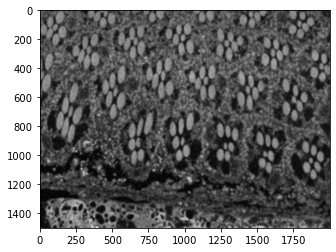

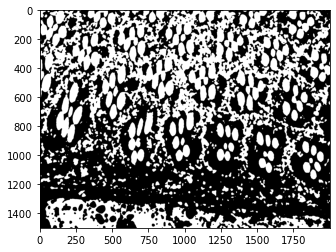

In [203]:
a = a.copy()
a = a * 255
a = a.astype(np.uint8)
print(a.min(), a.max())
print(a.dtype)
a = mh.gaussian_filter(a, sigma=4)
plt.figure()
plt.imshow(a, cmap='gray')
a = a/a.max()
a = a * 255
a = a.astype(np.uint8)
print(a.min(), a.max())
print(a.dtype)
t_otsu = mh.otsu(a)
a = (a > t_otsu)
plt.figure()
plt.imshow(a, cmap='gray')

In [204]:
labeled, n_nucleus  = mh.label(a)
print('Found {} nuclei.'.format(n_nucleus))

Found 556 nuclei.


In [205]:
labeled = mh.labeled.remove_bordering(labeled)

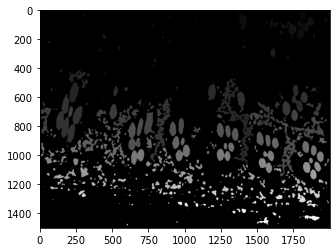

In [206]:
plt.figure()
plt.imshow(labeled, cmap='gray')

In [211]:
z = nina_d1_norm_imgs[200]

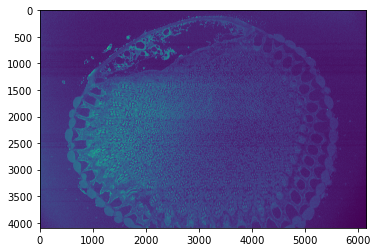

In [212]:
plt.imshow(z)

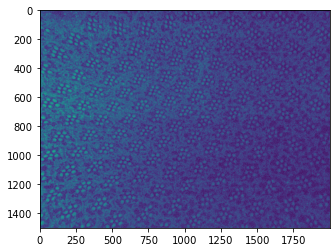

In [217]:
x, y = z.shape[0], z.shape[1]
x_new, y_new = 1500, 2000
left, top, right, bottom = center_crop(x, y, x_new, y_new)
a = z[left:right, top:bottom]
plt.imshow(a)

0 252
uint8
29 255
uint8


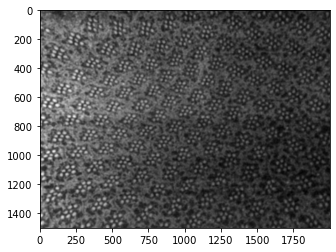

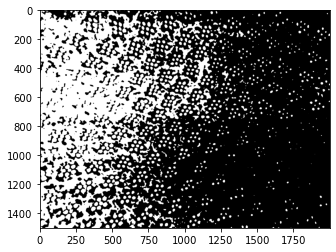

In [218]:
a = a.copy()
a = a * 255
a = a.astype(np.uint8)
print(a.min(), a.max())
print(a.dtype)
a = mh.gaussian_filter(a, sigma=4)
plt.figure()
plt.imshow(a, cmap='gray')
a = a/a.max()
a = a * 255
a = a.astype(np.uint8)
print(a.min(), a.max())
print(a.dtype)
t_otsu = mh.otsu(a)
a = (a > t_otsu)
plt.figure()
plt.imshow(a, cmap='gray')

In [220]:
labeled, number = mh.label(a)

In [221]:
number

960

In [222]:
sizes = mh.labeled.labeled_size(labeled)

In [223]:
sizes.max

<function ndarray.max>

In [224]:
sizes.max()

2040853

In [225]:
sizes.min()

1

In [226]:
sizes

array([2040853,  692705,     187,     141,       6,     250,     135,
            60,      16,     217,    1633,     120,      28,      19,
            13,     132,     272,     173,     105,     121,      96,
           226,     289,     129,      48,     218,      75,      10,
           152,     124,       5,     231,      35,      87,     303,
           416,     342,      15,      56,     202,     102,      40,
           281,      88,     127,     590,      37,     128,       4,
           120,      87,     185,    5048,       4,      74,     259,
           119,     519,      99,     360,    4524,     461,     593,
           135,      33,     496,     229,      59,      70,     378,
           456,     153,     190,     211,      17,      85,     182,
           292,     404,      93,     497,     193,      47,     351,
           374,     287,     377,     118,     207,      81,     393,
           681,     416,     171,       3,     100,     542,     122,
            44,     

In [227]:
too_large = np.where(sizes > 20500)

In [228]:
labeled_only_big = mh.labeled.remove_regions(labeled, too_large)

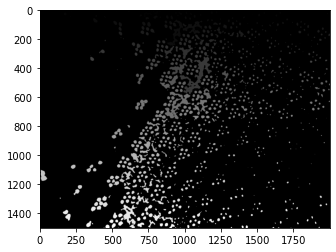

In [229]:
plt.figure()
plt.imshow(labeled_only_big, cmap='gray')

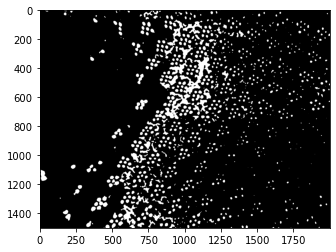

In [230]:
binary_mask = labeled_only_big.copy()
binary_mask[binary_mask > 0] = 1
plt.figure()
plt.imshow(binary_mask, cmap='gray')

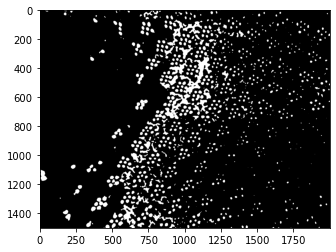

In [231]:
binary_mask_closed = mh.morph.close(binary_mask)
plt.figure()
plt.imshow(binary_mask_closed, cmap='gray')